In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

In [146]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [147]:
data = pd.read_csv('sales_data_sample.csv', sep=",", encoding='latin1')

In [148]:
pd.set_option('display.max_columns', None)

In [149]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [151]:
data.shape

(2823, 25)

In this section

Data Cleaning
Feature Engineering
In order to, get a full grasp of what steps should I be taking to clean the dataset. Let us have a look at the information in data.

In [152]:
data.drop('ADDRESSLINE2', axis = 1, inplace = True)

In [153]:
data['STATE'].fillna(data['STATE'].mode()[0], inplace = True)
data['POSTALCODE'].fillna(data['POSTALCODE'].mode()[0], inplace = True)
data['TERRITORY'].fillna(data['TERRITORY'].mode()[0], inplace = True)

In [154]:
#To remove the NA values
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2823


In [155]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

In [156]:
data["ORDERDATE"] = pd.to_datetime(data["ORDERDATE"])
dates = []
for i in data["ORDERDATE"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2005-05-31
The oldest customer's enrolment date in the records: 2003-01-06


In [38]:
min(data['ORDERDATE'])

Timestamp('2003-01-06 00:00:00')

In [37]:
max(data['ORDERDATE'])

Timestamp('2005-05-31 00:00:00')

In [157]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


In [158]:
# Summary statistics of the data set
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [159]:
#Getting the value count of some import features:
print("The total categories in the variable: Status:\n", data["STATUS"].value_counts(), "\n")
print("The total categories in the variable: PRODUCTLINE:\n", data["PRODUCTLINE"].value_counts())
print("The total categories in the variable: City:\n", data["CITY"].value_counts(), "\n")
print("The total categories in the variable: STATE:\n", data["STATE"].value_counts())
print("The total categories in the variable: CUSTOMERNAME:\n", data["CUSTOMERNAME"].value_counts(), "\n")
print("The total categories in the variable: COUNTRY:\n", data["COUNTRY"].value_counts())
print("The total categories in the variable: TERRITORY:\n", data["TERRITORY"].value_counts(), "\n")
print("The total categories in the variable: DEALSIZE:\n", data["DEALSIZE"].value_counts())

The total categories in the variable: Status:
 Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64 

The total categories in the variable: PRODUCTLINE:
 Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64
The total categories in the variable: City:
 Madrid         304
San Rafael     180
NYC            152
Singapore       79
Paris           70
              ... 
Graz            15
Los Angeles     14
Munich          14
Burbank         13
Charleroi        8
Name: CITY, Length: 73, dtype: int64 

The total categories in the variable: STATE:
 CA               1902
MA                190
NY                178
NSW                92
Victoria           78
PA                 75
CT                 61
BC                 48
NH                 34
Tokyo              32

In [161]:
print("The maximum sales by a customer is:", data['SALES'].max())
print("The minimum sales by a customer is:", data['SALES'].min())
print("The average sales by a customer is:", data['SALES'].mean())
print("The median sales by a customer is", data['SALES'].median())

The maximum sales by a customer is: 14082.8
The minimum sales by a customer is: 482.13
The average sales by a customer is: 3553.88907190932
The median sales by a customer is 3184.8


In [162]:
print("The minimum price of product bought by a customer is:", data['PRICEEACH'].min())
print("The maximum price of product bought by a customer is:", data['PRICEEACH'].max())

print("The minimum sales from a customer is:", data['SALES'].min())
print("The maximum sales from a customer is:", data['SALES'].max())

The minimum price of product bought by a customer is: 26.88
The maximum price of product bought by a customer is: 100.0
The minimum sales from a customer is: 482.13
The maximum sales from a customer is: 14082.8


In [74]:
#Finding all integer columns in the data set
int_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'int64':
        int_col.append(x)
        
int_col

['ORDERNUMBER',
 'QUANTITYORDERED',
 'ORDERLINENUMBER',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'MSRP']

In [75]:
#Finding all integer columns in the data set
int_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'float':
        int_col.append(x)
        
int_col

['PRICEEACH', 'SALES']

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

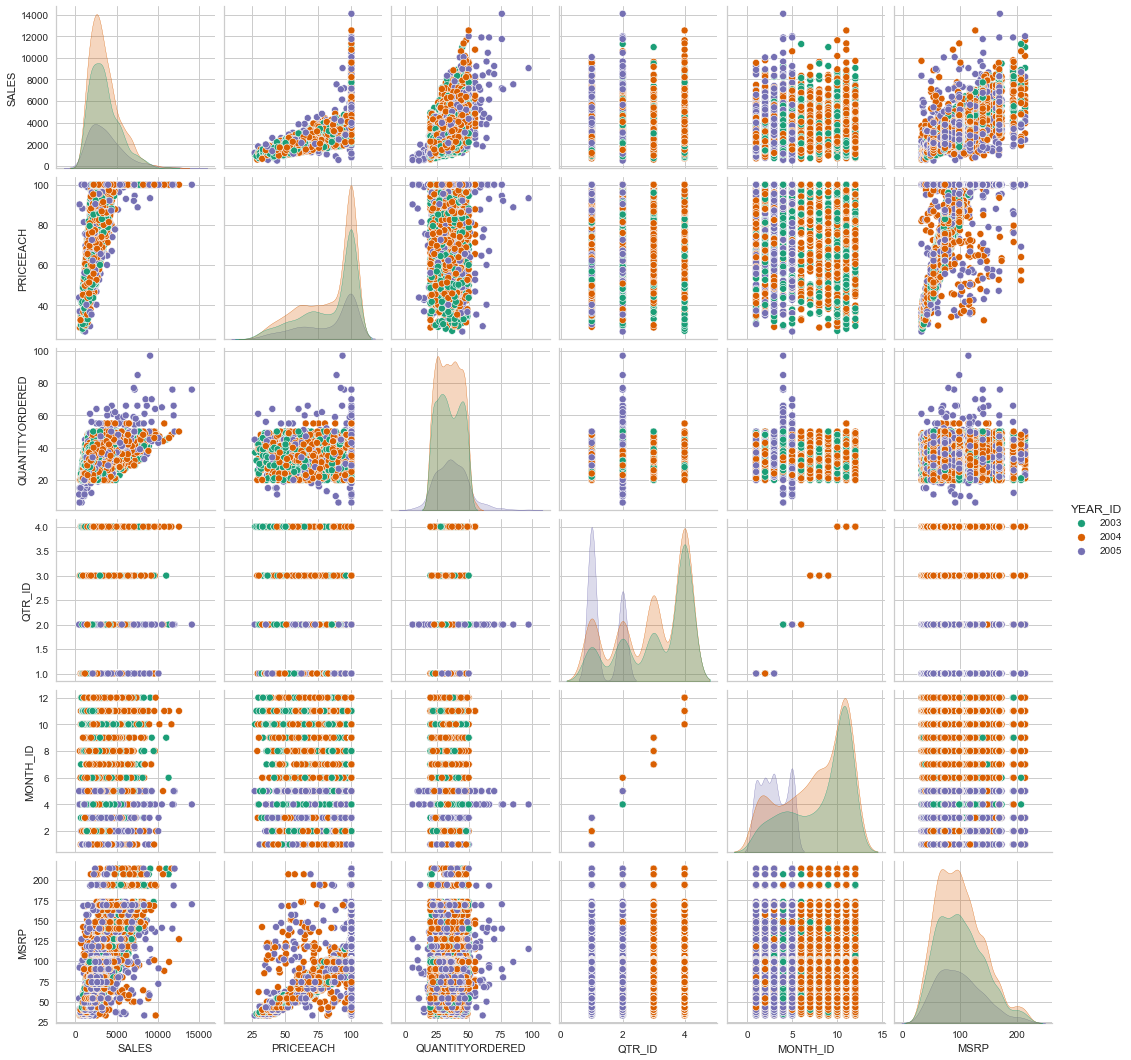

In [164]:
#Plotting following variables
sns.color_palette("Set2")
plot = ["SALES", "PRICEEACH", "QUANTITYORDERED", "QTR_ID", "MONTH_ID", "YEAR_ID", "MSRP"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
plt.show()

sns.pairplot(data[plot],hue ='YEAR_ID', palette='Dark2')

In [49]:
data.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small


<AxesSubplot:>

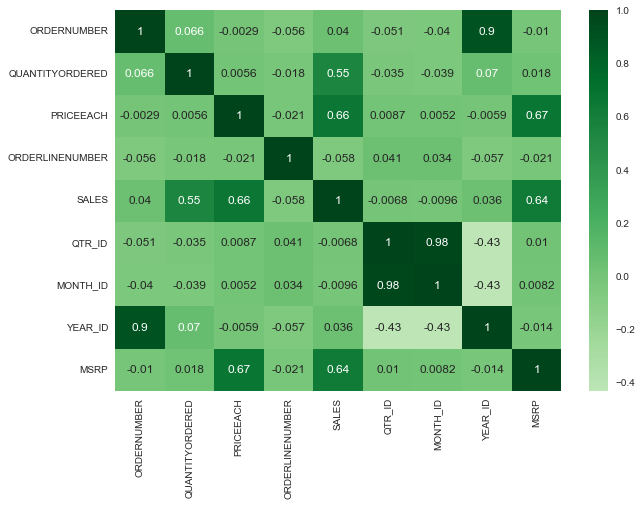

In [165]:
#To get the correlation matrix
corrplot= data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrplot,annot=True, cmap='Greens', center=0)

In [166]:
#To create a copy of the data set
data2 = data.copy()

<AxesSubplot:xlabel='SALES'>

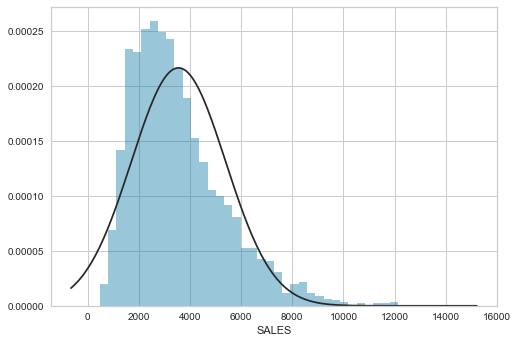

In [167]:
from scipy.stats import norm
sns.distplot(data['SALES'], fit=norm, kde=False)

<AxesSubplot:xlabel='PRICEEACH'>

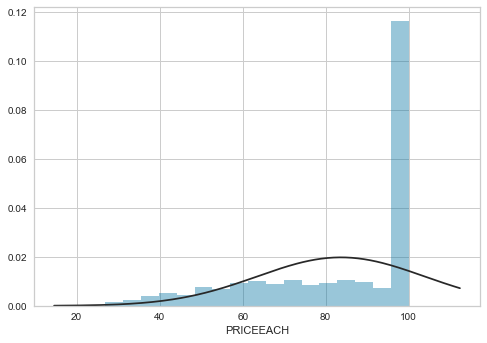

In [168]:
from scipy.stats import norm
sns.distplot(data['PRICEEACH'], fit=norm, kde=False)

In [185]:
#To avoid a skewed analysis, outliers have to be removed from the Age and Income columns. 
data = data[(data["SALES"]<14000)]
data = data[(data["PRICEEACH"]<90)]
print("The number of data values after removing the outliers are:", len(data))

The number of data values after removing the outliers are: 1289


Having removed the outliers, I plotted the features again and they now have a normal distribution

<AxesSubplot:xlabel='SALES'>

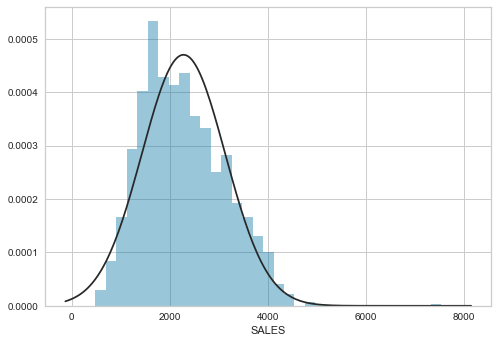

In [186]:
from scipy.stats import norm
sns.distplot(data['SALES'], fit=norm, kde=False)

<AxesSubplot:xlabel='PRICEEACH'>

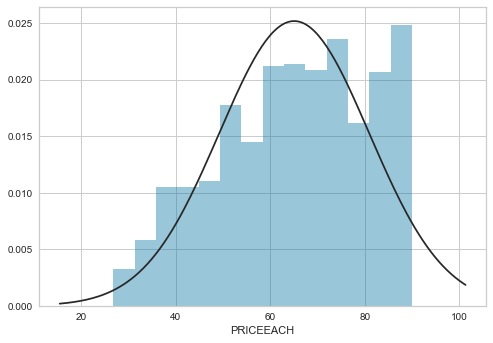

In [187]:
from scipy.stats import norm
sns.distplot(data['PRICEEACH'], fit=norm, kde=False)

### Data Preprocessing

In [192]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction

In [193]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for x in object_cols:
    data[x]=data[[x]].apply(LE.fit_transform)
    
print("All variables are now numerical")

All variables are now numerical


In [194]:
#Creating a copy of data
data1 = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME','CITY', 'STATE', 'COUNTRY', 'TERRITORY', 'ORDERDATE']
data1 = data1.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(data1)
scaled_data1 = pd.DataFrame(scaler.transform(data1),columns= data1.columns )
print("All features are now scaled")

All features are now scaled


In [195]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_data1.head()

Dataframe to be used for further modelling:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,POSTALCODE,DEALSIZE,Clusters
0,-1.497415,-0.113384,1.026557,-0.382812,0.567692,0.253068,-0.581953,-0.563070,-1.180063,-0.763752,0.864696,-2.340308,0.787815,-0.231546,0.521992,0.858976
1,-1.236846,1.050756,1.147102,-0.147502,1.722822,0.253068,0.247845,0.257349,-1.180063,-0.763752,0.864696,-2.340308,1.550047,0.807571,-1.898325,-0.062172
2,-0.856849,-0.642539,1.328234,0.558427,0.251903,0.253068,1.077644,1.077767,-1.180063,-0.763752,0.864696,-2.340308,-0.816884,-0.042616,0.521992,-0.983320
3,1.108279,-1.595017,0.471169,1.499665,-0.980922,0.253068,1.077644,1.351240,0.257651,-0.763752,0.864696,-2.340308,1.148872,-1.081732,0.521992,-0.983320
4,1.260278,-1.489186,-1.904380,1.264355,-1.826412,0.253068,-1.411752,-1.383489,1.695365,-0.763752,0.864696,-2.340308,-0.094769,-0.467709,0.521992,1.780123


In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

Dimensionality reduction with PCA
Plotting the reduced dataframe
Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [174]:
#Initiating PCA to reduce dimentions aka variables to 3
pca = PCA(n_components=3)
pca.fit(scaled_data1)
PCA_ds = pd.DataFrame(pca.transform(scaled_data1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1289.0,0.000000e+00,1.704443,-3.836650,-1.217348,-0.288426,1.120147,9.209579
col2,1289.0,-5.253965e-17,1.565810,-3.373667,-1.153506,-0.195837,1.091289,3.972647
col3,1289.0,5.779361e-16,1.292280,-3.532961,-0.863606,0.056307,0.856943,4.142179


### Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

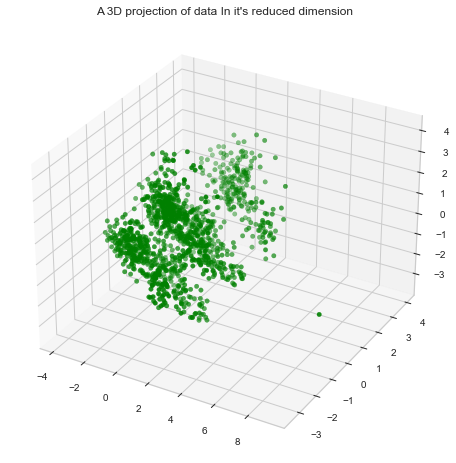

In [196]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="o")
ax.set_title("A 3D projection of data In it's reduced dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


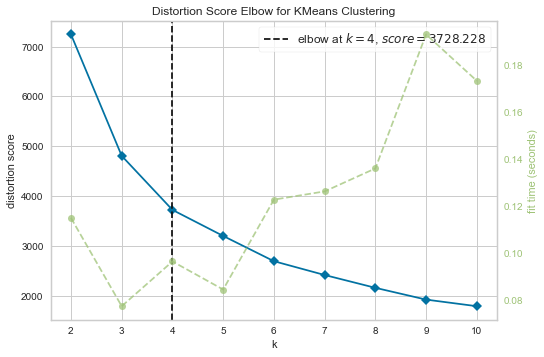

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [221]:
# Quick examination of elbow method to find number of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [177]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

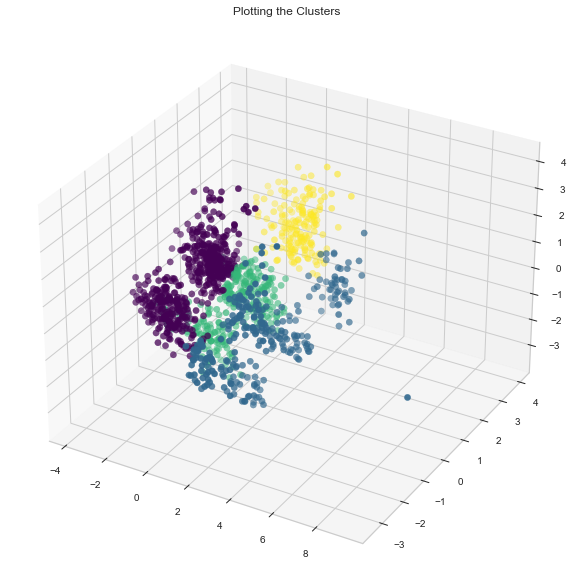

In [199]:
#Plotting the clusters
fig = plt.figure(figsize=(10,12))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis')
ax.set_title("Plotting the Clusters")
plt.show()

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring

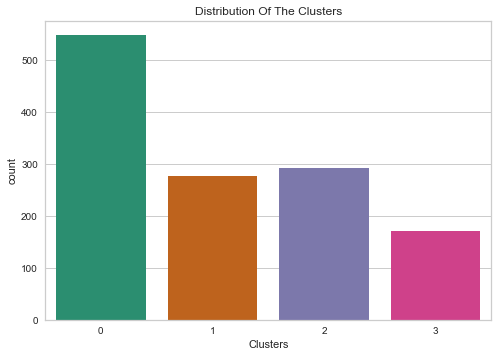

In [179]:
#Plotting the clusters' countplot
pl = sns.countplot(x=data["Clusters"], palette= 'Dark2')
pl.set_title("Distribution Of The Clusters")
plt.show()

### Evaluating the model

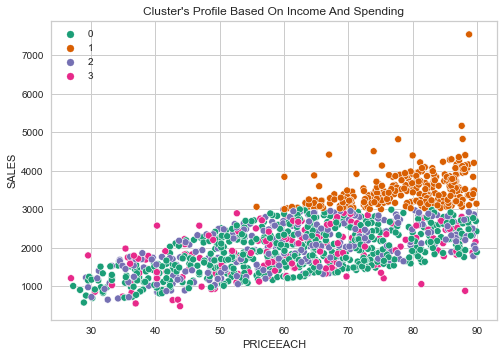

In [180]:
pl = sns.scatterplot(data = data,x=data["PRICEEACH"], y=data["SALES"],hue=data["Clusters"], palette= 'Dark2')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Sales vs Priceeach plot shows the clusters pattern

group 0: high spending & average income
group 1: high spending & high income
group 2: low spending & low income
group 3: high spending & low income
Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, STATUS, QTR_ID, MONTH_ID, STATE,DEALSIZE

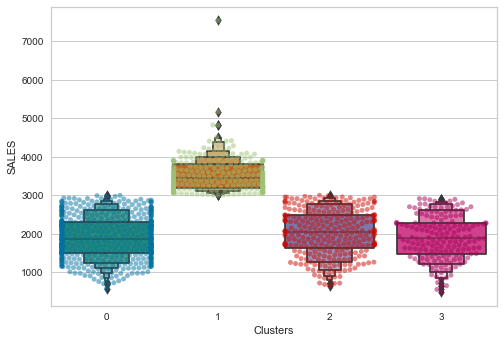

In [181]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["SALES"], alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["SALES"], palette='Dark2')
plt.show()

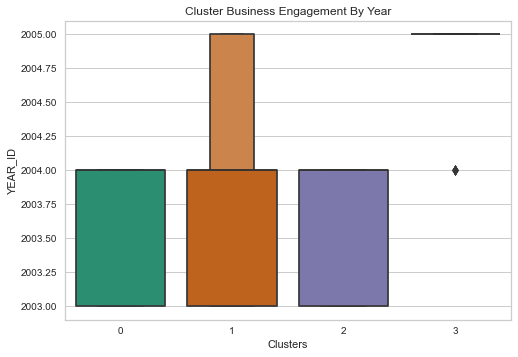

In [120]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["YEAR_ID"],x=data["Clusters"], palette= 'Dark2')
pl.set_title("Cluster Business Engagement By Year")
plt.show()

<Figure size 576x396 with 0 Axes>

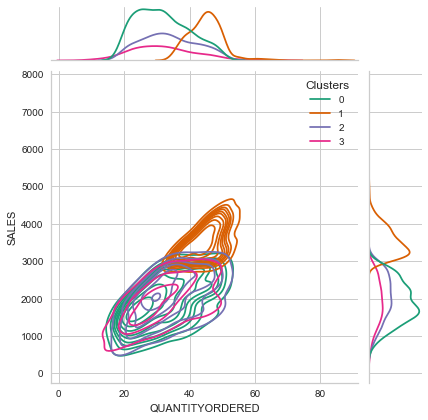

<Figure size 576x396 with 0 Axes>

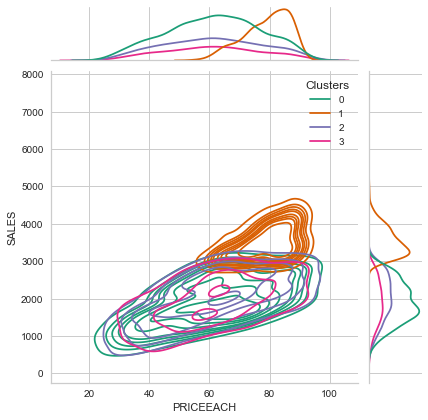

<Figure size 576x396 with 0 Axes>

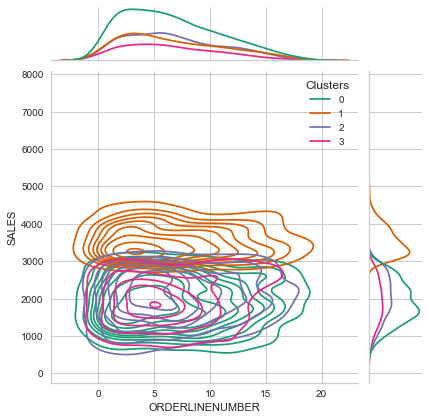

<Figure size 576x396 with 0 Axes>

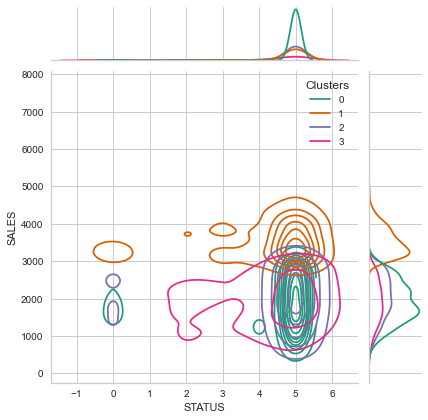

<Figure size 576x396 with 0 Axes>

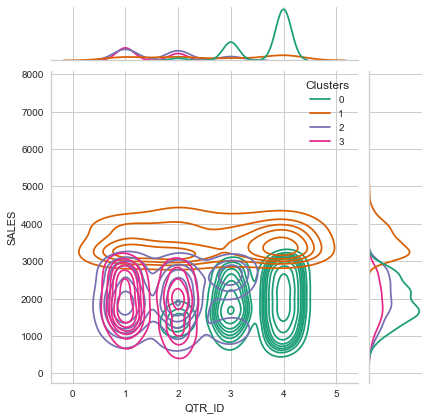

<Figure size 576x396 with 0 Axes>

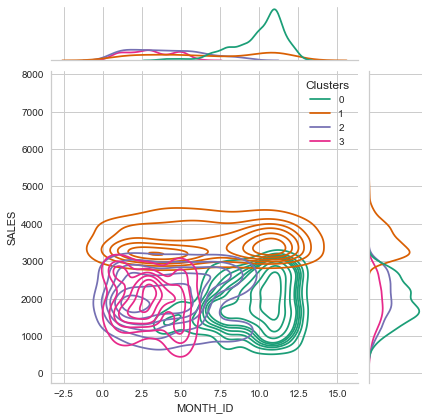

<Figure size 576x396 with 0 Axes>

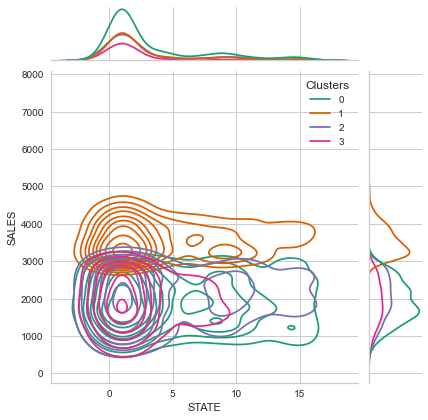

<Figure size 576x396 with 0 Axes>

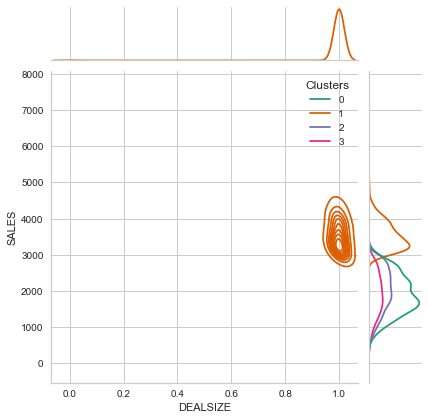

In [266]:
Per_Customer = [ "QUANTITYORDERED","PRICEEACH","ORDERLINENUMBER", "STATUS", "QTR_ID", "MONTH_ID", "STATE","DEALSIZE"]

for x in To_Indiv:
    plt.figure()
    sns.jointplot(x=data[x], y=data["SALES"], hue =data["Clusters"], kind="kde", palette='Dark2')
    plt.show()

## Using the copy of the DataFrame to do further analysis. (EDA)

In [238]:
data2.groupby('CUSTOMERNAME').sum()['SALES'].sort_values(ascending = False)[:20]

CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Souveniers And Things Co.       151570.98
Corporate Gift Ideas Co.        149882.50
Salzburg Collectables           149798.63
Danish Wholesale Imports        145041.60
Saveley & Henriot, Co.          142874.25
L'ordine Souveniers             142601.33
Rovelli Gifts                   137955.72
Reims Collectables              135042.94
Scandinavian Gift Ideas         134259.33
Online Diecast Creations Co.    131685.30
Name: SALES, dtype: float64

In [250]:
def categorise(row):  
    if row['SALES'] > 0 and row['SALES'] <= 4000:
        return 'Low Income Customer'
    elif row['SALES'] > 4000 and row['SALES'] <= 8000:
        return 'Middle Income Customer'
    return 'High Income Customer'

In [251]:
data2['Customer Status'] = data2.apply(lambda row: categorise(row), axis=1)

In [254]:
data2['Customer Status'].value_counts()

Low Income Customer       1905
Middle Income Customer     839
High Income Customer        79
Name: Customer Status, dtype: int64

<AxesSubplot:xlabel='Customer Status'>

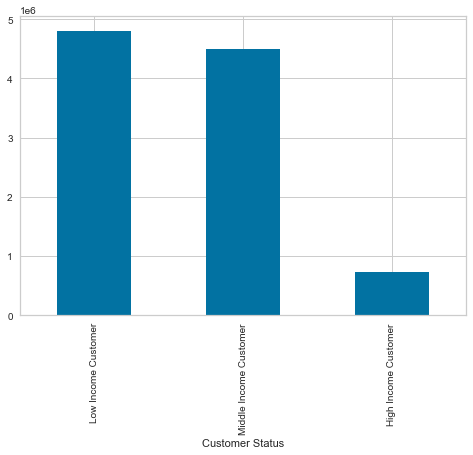

In [310]:
data2.groupby('Customer Status').sum()['SALES'].sort_values(ascending = False).plot(kind = 'bar', x = 'Customer Status', y = 'SALES')

In [257]:
data2.groupby('STATE').sum()['SALES'].sort_values(ascending = False)

STATE
CA               6789077.94
MA                666443.72
NY                646343.76
NSW               305567.11
PA                273327.27
Victoria          265586.87
CT                238661.28
BC                149873.77
NH                131685.30
Tokyo             120562.74
NJ                 83228.19
NV                 82751.08
Isle of Wight      78240.84
Quebec             74204.79
Osaka              67605.07
Queensland         59469.12
Name: SALES, dtype: float64

<AxesSubplot:xlabel='STATE'>

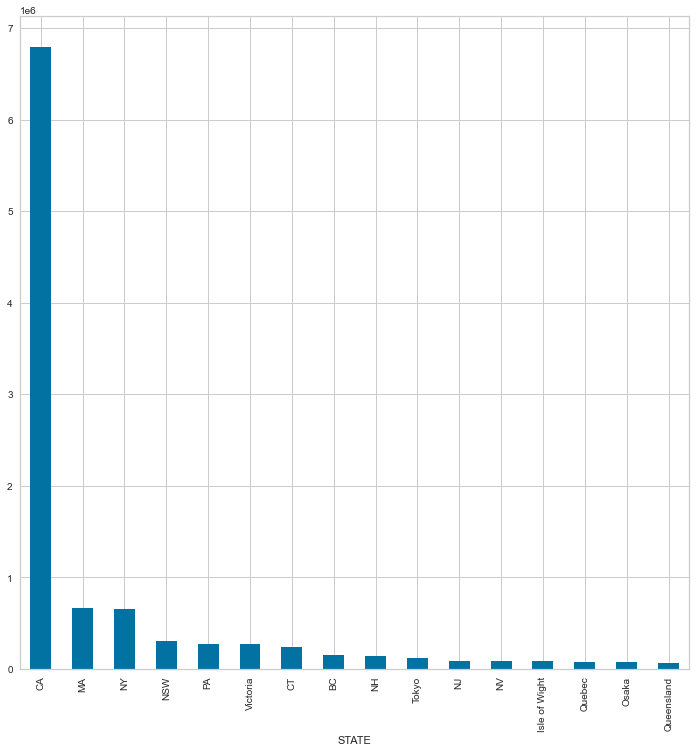

In [309]:
plt.figure(figsize=(12,12))
data2.groupby('STATE').sum()['SALES'].sort_values(ascending = False).plot(kind = 'bar', x = 'STATE', y = 'SALES')

In [258]:
data2.groupby('COUNTRY').sum()['SALES'].sort_values(ascending = False)

COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

<AxesSubplot:xlabel='COUNTRY'>

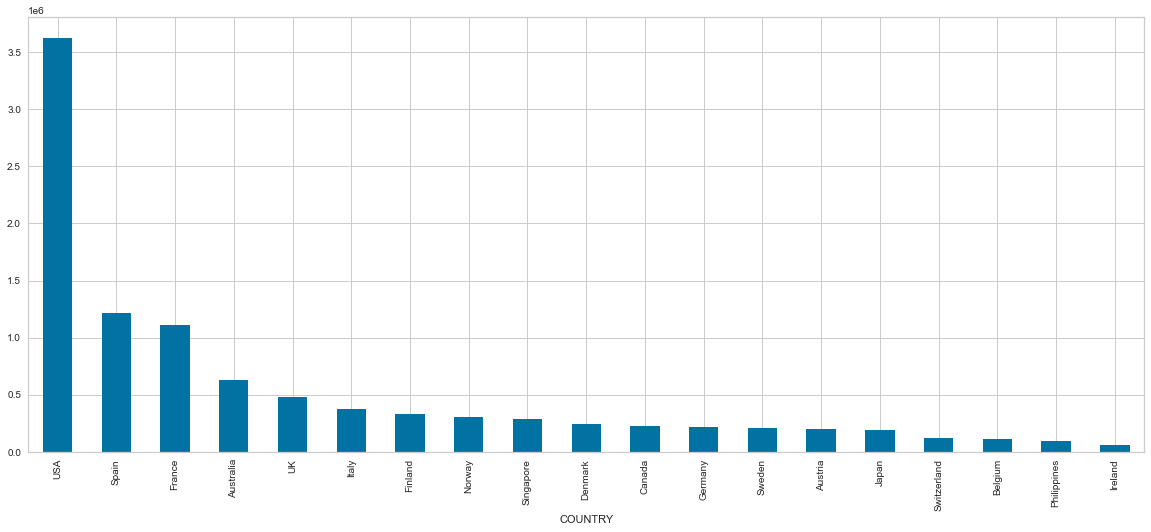

In [308]:
plt.figure(figsize=(20,8))
data2.groupby('COUNTRY').sum()['SALES'].sort_values(ascending = False).plot(kind = 'bar', x = 'COUNTRY', y = 'SALES')

In [303]:
data2.groupby('YEAR_ID').sum()['SALES'].sort_values(ascending = False)

YEAR_ID
2004    4724162.60
2003    3516979.54
2005    1791486.71
Name: SALES, dtype: float64

<AxesSubplot:xlabel='YEAR_ID'>

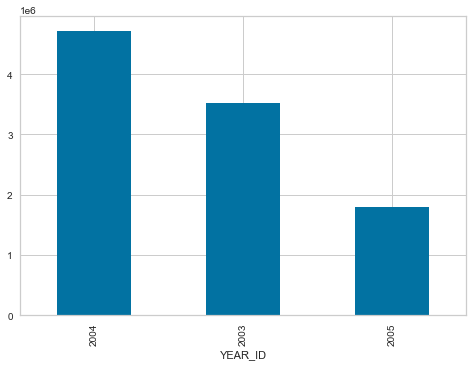

In [304]:
data2.groupby('YEAR_ID').sum()['SALES'].sort_values(ascending = False).plot(kind = 'bar', x = 'YEAR_ID', y = 'SALES')

In [260]:
data2.groupby('MONTH_ID').sum()['SALES'].sort_values(ascending = False)

MONTH_ID
11    2118885.67
10    1121215.22
5      923972.56
2      810441.90
1      785874.44
3      754501.39
4      669390.96
8      659310.57
12     634679.12
9      584724.27
7      514875.97
6      454756.78
Name: SALES, dtype: float64

<AxesSubplot:xlabel='MONTH_ID'>

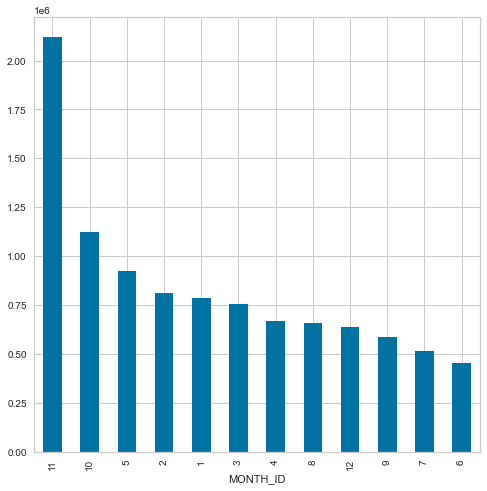

In [305]:
plt.figure(figsize=(8,8))
data2.groupby('MONTH_ID').sum()['SALES'].sort_values(ascending = False).plot(kind = 'bar', x = 'MONTH_ID', y = 'SALES')

In [261]:
data2.groupby('PRODUCTLINE').sum()['SALES'].sort_values(ascending = False)

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

<AxesSubplot:xlabel='PRODUCTLINE'>

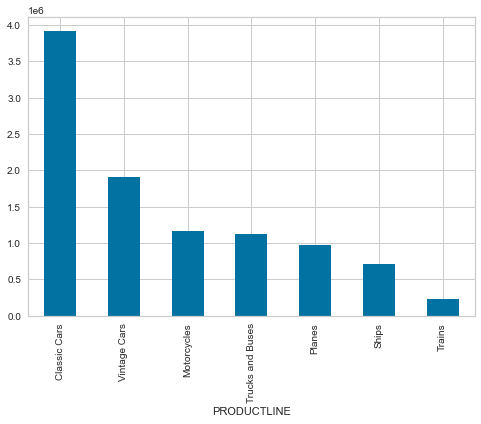

In [306]:
data2.groupby('PRODUCTLINE').sum()['SALES'].sort_values(ascending = False).plot(kind = 'bar', x = 'PRODUCTLINE', y = 'SALES')

In [263]:
data2.groupby('CITY').sum()['SALES'].sort_values(ascending = False)[:15]

CITY
Madrid           1082551.44
San Rafael        654858.06
NYC               560787.77
Singapore         288488.41
Paris             268944.68
San Francisco     224358.68
New Bedford       207874.86
Nantes            204304.86
Melbourne         200995.41
Brickhaven        165255.20
San Jose          160010.27
Manchester        157807.81
Boston            154069.66
North Sydney      153996.13
Chatswood         151570.98
Name: SALES, dtype: float64

<AxesSubplot:xlabel='CITY'>

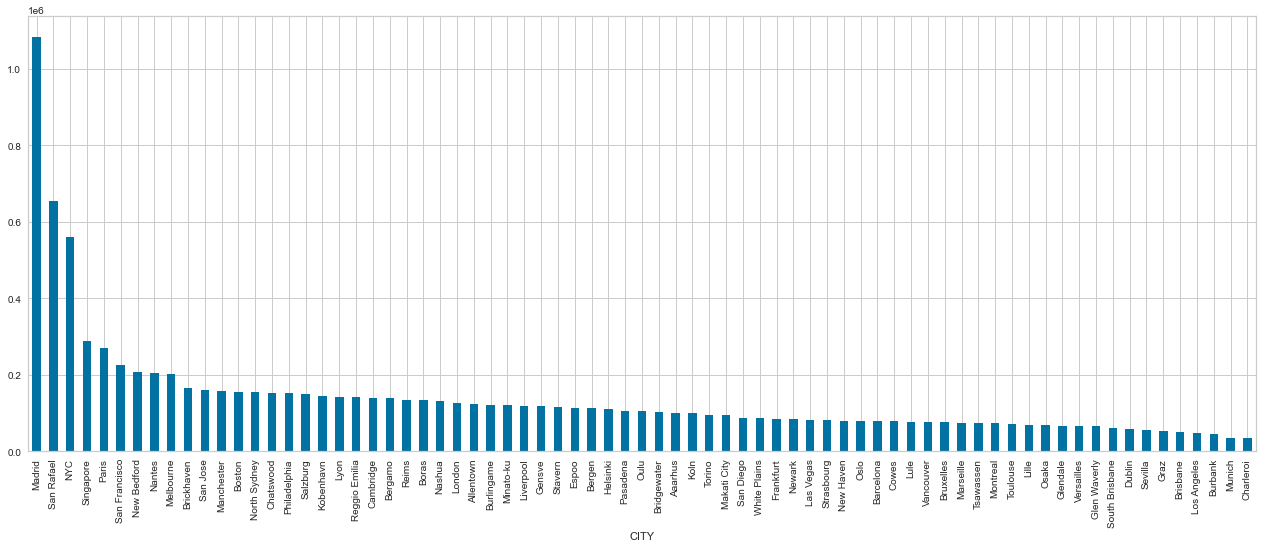

In [307]:
plt.figure(figsize=(22,8))
data2.groupby('CITY').sum()['SALES'].sort_values(ascending = False).plot(kind = 'bar', x = 'CITY', y = 'SALES')

## The End